<a href="https://colab.research.google.com/github/Zhansaya515/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Пример: читаем файл "titanic.xlsx"
df = pd.read_csv('titanic.csv')  # или укажи путь к файлу

# Посмотреть первые строки
# print(df.head())



 # df.drop(columns=['PassengerId','Name','Ticket'])
# df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
# Посмотреть первые строки
print(df.head())

duplicates = df[df.duplicated()]

# Выводим результат
if not duplicates.empty:
    print(f"Найдено {duplicates.shape[0]} дубликатов. Вот они:")
    print(duplicates)
else:
    print("Дубликаты не найдены.")



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ду

In [3]:
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
# Целевая переменная
df['Survived'] = df['Survived'].astype(int)

missing = df.isnull().sum()

# Выводим результат
print(missing)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [5]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna('S')
missing = df.isnull().sum()

# Выводим результат
print(missing)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [6]:
import pandas as pd
import numpy as np
import math
# Шаг 2: Биннинг
df['Age_bin'] = pd.cut(df['Age'], bins=[0.00, 25.00, 30.00, 81.00], labels=['0-25', '25-30', '30-81'])

# Шаг 3: Расчет WOE
total_good = (df['Survived'] == 1).sum()
total_bad = (df['Survived'] == 0).sum()
pd.set_option('display.max_rows', None)

woe_table = df.groupby('Age_bin')['Survived'].agg([
    ('Count', 'count'),
    ('Good', 'sum'),])
woe_table['Bad'] = woe_table['Count'] - woe_table['Good']
woe_table['Distr_Good'] = woe_table['Good'] / total_good
woe_table['Distr_Bad'] = woe_table['Bad'] / total_bad

woe_table['WOE'] = np.log((woe_table['Distr_Good'].replace(0, 0.5 / total_good)) /
                          (woe_table['Distr_Bad'].replace(0, 0.5 / total_bad)))
woe_table['IV'] = (woe_table['Distr_Good']-woe_table['Distr_Bad'])*woe_table['WOE']
# Шаг 4: Назначаем WOE значения обратно в датафрейм
woe_map = woe_table['WOE'].to_dict()
df['Age_WOE'] = df['Age_bin'].map(woe_map)
IV=woe_table['IV'].sum()
print("\n=== Таблица с результатами ===")
print(woe_table)
print("\n=== Total IV ===")
print(IV)


=== Таблица с результатами ===
         Count  Good  Bad  Distr_Good  Distr_Bad       WOE        IV
Age_bin                                                             
0-25       301   124  177    0.362573   0.322404  0.117420  0.004717
25-30      285    94  191    0.274854   0.347905 -0.235691  0.017218
30-81      305   124  181    0.362573   0.329690  0.095072  0.003126

=== Total IV ===
0.025060402780195033


/tmp/ipython-input-6-1117137649.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby('Age_bin')['Survived'].agg([


In [7]:
import pandas as pd
import numpy as np
import math

# Шаг 3: Расчет WOE
total_good = (df['Survived'] == 1).sum()
total_bad = (df['Survived'] == 0).sum()
pd.set_option('display.max_rows', None)

# Count от 0 до 8 количество написать
Sexcount = df.Sex.value_counts()

# Выводим результат
print(Sexcount)
woe_table = df.groupby('Sex')['Survived'].agg([
    ('Count', 'count'),
    ('Good', 'sum'),])
woe_table['Bad'] = woe_table['Count'] - woe_table['Good']
woe_table['Distr_Good'] = woe_table['Good'] / total_good
woe_table['Distr_Bad'] = woe_table['Bad'] / total_bad

woe_table['WOE'] = np.log((woe_table['Distr_Good'].replace(0, 0.5 / total_good)) /
                          (woe_table['Distr_Bad'].replace(0, 0.5 / total_bad)))
woe_table['IV'] = (woe_table['Distr_Good']-woe_table['Distr_Bad'])*woe_table['WOE']
# Шаг 4: Назначаем WOE значения обратно в датафрейм
woe_map = woe_table['WOE'].to_dict()
df['Sex_WOE'] = df['Sex'].map(woe_map)
IV=woe_table['IV'].sum()
print("\n=== Таблица с результатами ===")
print(woe_table)
print("\n=== Total IV ===")
print(IV)

Sex
male      577
female    314
Name: count, dtype: int64

=== Таблица с результатами ===
        Count  Good  Bad  Distr_Good  Distr_Bad       WOE        IV
Sex                                                                
female    314   233   81    0.681287   0.147541  1.529877  0.816565
male      577   109  468    0.318713   0.852459 -0.983833  0.525116

=== Total IV ===
1.3416814135556492


In [8]:
import pandas as pd
import numpy as np
import math

# Шаг 3: Расчет WOE
total_good = (df['Survived'] == 1).sum()
total_bad = (df['Survived'] == 0).sum()
pd.set_option('display.max_rows', None)


woe_table = df.groupby('Pclass')['Survived'].agg([
    ('Count', 'count'),
    ('Good', 'sum'),])
woe_table['Bad'] = woe_table['Count'] - woe_table['Good']
woe_table['Distr_Good'] = woe_table['Good'] / total_good
woe_table['Distr_Bad'] = woe_table['Bad'] / total_bad

woe_table['WOE'] = np.log((woe_table['Distr_Good'].replace(0, 0.5 / total_good)) /
                          (woe_table['Distr_Bad'].replace(0, 0.5 / total_bad)))
woe_table['IV'] = (woe_table['Distr_Good']-woe_table['Distr_Bad'])*woe_table['WOE']
# Шаг 4: Назначаем WOE значения обратно в датафрейм
woe_map = woe_table['WOE'].to_dict()
df['Pclass_WOE'] = df['Pclass'].map(woe_map)
IV=woe_table['IV'].sum()
print("\n=== Таблица с результатами ===")
print(woe_table)
print("\n=== Total IV ===")
print(IV)


=== Таблица с результатами ===
        Count  Good  Bad  Distr_Good  Distr_Bad       WOE        IV
Pclass                                                             
1         216   136   80    0.397661   0.145719  1.003916  0.252928
2         184    87   97    0.254386   0.176685  0.364485  0.028321
3         491   119  372    0.347953   0.677596 -0.666483  0.219701

=== Total IV ===
0.500949737583947


In [9]:
import pandas as pd
import numpy as np
import math

# Шаг 3: Расчет WOE
total_good = (df['Survived'] == 1).sum()
total_bad = (df['Survived'] == 0).sum()
pd.set_option('display.max_rows', None)


woe_table = df.groupby('Embarked')['Survived'].agg([
    ('Count', 'count'),
    ('Good', 'sum'),])
woe_table['Bad'] = woe_table['Count'] - woe_table['Good']
woe_table['Distr_Good'] = woe_table['Good'] / total_good
woe_table['Distr_Bad'] = woe_table['Bad'] / total_bad

woe_table['WOE'] = np.log((woe_table['Distr_Good'].replace(0, 0.5 / total_good)) /
                          (woe_table['Distr_Bad'].replace(0, 0.5 / total_bad)))
woe_table['IV'] = (woe_table['Distr_Good']-woe_table['Distr_Bad'])*woe_table['WOE']
# Шаг 4: Назначаем WOE значения обратно в датафрейм
woe_map = woe_table['WOE'].to_dict()
df['Embarked_WOE'] = df['Embarked'].map(woe_map)
IV=woe_table['IV'].sum()
print("\n=== Таблица с результатами ===")
print(woe_table)
print("\n=== Total IV ===")
print(IV)


=== Таблица с результатами ===
          Count  Good  Bad  Distr_Good  Distr_Bad       WOE        IV
Embarked                                                             
C           168    93   75    0.271930   0.136612  0.688399  0.093153
Q            77    30   47    0.087719   0.085610  0.024337  0.000051
S           646   219  427    0.640351   0.777778 -0.194425  0.026719

=== Total IV ===
0.11992314886008477


In [10]:
# SibSp
import pandas as pd
import numpy as np
import math
# Шаг 2: Биннинг
df['SibSp_bin'] = pd.cut(df['SibSp'], bins=[-1, 0, 8], labels=['0','1-8'])

# Шаг 3: Расчет WOE
total_good = (df['Survived'] == 1).sum()
total_bad = (df['Survived'] == 0).sum()
pd.set_option('display.max_rows', None)

# Count от 0 до 8 количество написать
sibcount = df.SibSp.value_counts()

# Выводим результат
print(sibcount)


pd.set_option('display.max_rows', None)

# Отбор нужных переменных
ages = df[['SibSp_bin','SibSp','Survived']]
# print(ages)
woe_table = df.groupby('SibSp_bin')['Survived'].agg([
    ('Count', 'count'),
    ('Good', 'sum'),])
woe_table['Bad'] = woe_table['Count'] - woe_table['Good']
woe_table['Distr_Good'] = woe_table['Good'] / total_good
woe_table['Distr_Bad'] = woe_table['Bad'] / total_bad

woe_table['WOE'] = np.log((woe_table['Distr_Good'].replace(0, 0.5 / total_good)) /
                          (woe_table['Distr_Bad'].replace(0, 0.5 / total_bad)))
woe_table['IV'] = (woe_table['Distr_Good']-woe_table['Distr_Bad'])*woe_table['WOE']
# Шаг 4: Назначаем WOE значения обратно в датафрейм
woe_map = woe_table['WOE'].to_dict()
df['SibSp_WOE'] = df['SibSp_bin'].map(woe_map)
IV=woe_table['IV'].sum()
print("\n=== Таблица с результатами ===")
print(woe_table)
print("\n=== Total IV ===")
print(IV)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

=== Таблица с результатами ===
           Count  Good  Bad  Distr_Good  Distr_Bad       WOE        IV
SibSp_bin                                                             
0            608   210  398    0.614035   0.724954 -0.166057  0.018419
1-8          283   132  151    0.385965   0.275046  0.338810  0.037581

=== Total IV ===
0.05599948330088643


/tmp/ipython-input-10-1274323170.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby('SibSp_bin')['Survived'].agg([


In [11]:
# Parch
import pandas as pd
import numpy as np
import math
# Шаг 2: Биннинг
df['Parch_bin'] = pd.cut(df['Parch'], bins=[-1, 2, 4, 6], labels=['-1-2', '2-4', '4-6'])

# Шаг 3: Расчет WOE
total_good = (df['Survived'] == 1).sum()
total_bad = (df['Survived'] == 0).sum()
pd.set_option('display.max_rows', None)


woe_table = df.groupby('Parch_bin')['Survived'].agg([
    ('Count', 'count'),
    ('Good', 'sum'),])
woe_table['Bad'] = woe_table['Count'] - woe_table['Good']
woe_table['Distr_Good'] = woe_table['Good'] / total_good
woe_table['Distr_Bad'] = woe_table['Bad'] / total_bad

woe_table['WOE'] = np.log((woe_table['Distr_Good'].replace(0, 0.5 / total_good)) /
                          (woe_table['Distr_Bad'].replace(0, 0.5 / total_bad)))
woe_table['IV'] = (woe_table['Distr_Good']-woe_table['Distr_Bad'])*woe_table['WOE']
# Шаг 4: Назначаем WOE значения обратно в датафрейм
woe_map = woe_table['WOE'].to_dict()
df['Parch_WOE'] = df['Parch_bin'].map(woe_map)
IV=woe_table['IV'].sum()
print("\n=== Таблица с результатами ===")
print(woe_table)
print("\n=== Total IV ===")
print(IV)


=== Таблица с результатами ===
           Count  Good  Bad  Distr_Good  Distr_Bad       WOE        IV
Parch_bin                                                             
-1-2         876   338  538    0.988304   0.979964  0.008475  0.000071
2-4            9     3    6    0.008772   0.010929 -0.219859  0.000474
4-6            6     1    5    0.002924   0.009107 -1.136150  0.007025

=== Total IV ===
0.007570305348245199


/tmp/ipython-input-11-1758322306.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby('Parch_bin')['Survived'].agg([


In [12]:
# Fare
import pandas as pd
import numpy as np
import math
# Шаг 2: Биннинг
df['Fare_bin'] = pd.cut(df['Fare'], bins=[-1, 10, 30, 900], labels=['-1-10', '10-30', '30-900'])

# Шаг 3: Расчет WOE
total_good = (df['Survived'] == 1).sum()
total_bad = (df['Survived'] == 0).sum()
pd.set_option('display.max_rows', None)


woe_table = df.groupby('Fare_bin')['Survived'].agg([
    ('Count', 'count'),
    ('Good', 'sum'),])
woe_table['Bad'] = woe_table['Count'] - woe_table['Good']
woe_table['Distr_Good'] = woe_table['Good'] / total_good
woe_table['Distr_Bad'] = woe_table['Bad'] / total_bad

woe_table['WOE'] = np.log((woe_table['Distr_Good'].replace(0, 0.5 / total_good)) /
                          (woe_table['Distr_Bad'].replace(0, 0.5 / total_bad)))
woe_table['IV'] = (woe_table['Distr_Good']-woe_table['Distr_Bad'])*woe_table['WOE']
# Шаг 4: Назначаем WOE значения обратно в датафрейм
woe_map = woe_table['WOE'].to_dict()
df['Fare_WOE'] = df['Fare_bin'].map(woe_map)
IV=woe_table['IV'].sum()
# iv_dict={}
# iv_dict['Fare']=IV
print("\n=== Таблица с результатами ===")
print(woe_table)
print("\n=== Total IV ===")
print(IV)



=== Таблица с результатами ===
          Count  Good  Bad  Distr_Good  Distr_Bad       WOE        IV
Fare_bin                                                             
-1-10       336    67  269    0.195906   0.489982 -0.916731  0.269588
10-30       321   139  182    0.406433   0.331512  0.203755  0.015266
30-900      234   136   98    0.397661   0.178506  0.800975  0.175537

=== Total IV ===
0.46039076908155124


/tmp/ipython-input-12-4117123733.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby('Fare_bin')['Survived'].agg([


In [13]:

def calc_woe_iv(df, feature, target):
    eps = 1e-6
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['dist_event'] = grouped['sum'] / grouped['sum'].sum()
    grouped['dist_non_event'] = grouped['non_event'] / grouped['non_event'].sum()
    grouped['woe'] = np.log((grouped['dist_event'] + eps) / (grouped['dist_non_event'] + eps))
    grouped['iv'] = (grouped['dist_event'] - grouped['dist_non_event']) * grouped['woe']
    iv = grouped['iv'].sum()
    return grouped[['woe']], iv

def calculate_woe_iv_all(df, features, target):
    woe_dict = {}
    iv_dict = {}
    df_woe = df.copy()

    for col in features:
        woe_table, iv = calc_woe_iv(df, col, target)
        iv_dict[col] = iv
        woe_dict[col] = woe_table.to_dict()['woe']
        df_woe[col + '_WOE'] = df[col].map(woe_dict[col])

    return df_woe, iv_dict


# Категориальные признаки
features = ['Sex', 'Pclass', 'Embarked']

# Добавим бинированные числовые
df['Age_bin'] = pd.qcut(df['Age'], q=4, duplicates='drop')
df['Fare_bin'] = pd.qcut(df['Fare'], q=4, duplicates='drop')

features += ['Age_bin', 'Fare_bin']


df_woe, iv_results = calculate_woe_iv_all(df, features, target='Survived')

# Посмотрим результат
for feat, iv in iv_results.items():
    print(f"{feat}: IV = {iv:.4f}")


woe_cols = [col for col in df_woe.columns if col.endswith('_WOE')]
print("WOE-признаки:", woe_cols)

# Модельный датафрейм:
df_model = df_woe[woe_cols + ['Survived']]
df_model.head()




Sex: IV = 1.3417
Pclass: IV = 0.5009
Embarked: IV = 0.1199
Age_bin: IV = 0.0326
Fare_bin: IV = 0.4023
WOE-признаки: ['Age_WOE', 'Sex_WOE', 'Pclass_WOE', 'Embarked_WOE', 'SibSp_WOE', 'Parch_WOE', 'Fare_WOE', 'Age_bin_WOE', 'Fare_bin_WOE']


/tmp/ipython-input-13-4218444014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target].agg(['count', 'sum'])
/tmp/ipython-input-13-4218444014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target].agg(['count', 'sum'])


,Age_WOE,Sex_WOE,Pclass_WOE,Embarked_WOE,SibSp_WOE,Parch_WOE,Fare_WOE,Age_bin_WOE,Fare_bin_WOE,Survived
0,0.117420,-0.983831,-0.666481,-0.194424,0.338810,0.008475,-0.916731,0.167905,-0.929904,0
1,0.095072,1.529872,1.003912,0.688395,0.338810,0.008475,0.800975,-0.005711,0.800497,1
2,-0.235691,1.529872,-0.666481,-0.194424,-0.166057,0.008475,-0.916731,-0.229615,-0.357059,1
3,0.095072,1.529872,1.003912,-0.194424,0.338810,0.008475,0.800975,0.220090,0.800497,1
4,0.095072,-0.983831,-0.666481,-0.194424,-0.166057,0.008475,-0.916731,0.220090,-0.357059,0


In [15]:

selected_features = [feat for feat, iv in iv_results.items() if iv >= 0.02]
woe_cols = [f + '_WOE' for f in selected_features]
df_model = df_woe[woe_cols + ['Survived']]
print(iv_results)

df_model.head()

{'Sex': np.float64(1.3416775308351383), 'Pclass': np.float64(0.5009480469879563), 'Embarked': np.float64(0.11992261744436161), 'Age_bin': np.float64(0.03262180660505631), 'Fare_bin': np.float64(0.4022828379859305)}


,Sex_WOE,Pclass_WOE,Embarked_WOE,Age_bin_WOE,Fare_bin_WOE,Survived
0,-0.983831,-0.666481,-0.194424,0.167905,-0.929904,0
1,1.529872,1.003912,0.688395,-0.005711,0.800497,1
2,1.529872,-0.666481,-0.194424,-0.229615,-0.357059,1
3,1.529872,1.003912,-0.194424,0.220090,0.800497,1
4,-0.983831,-0.666481,-0.194424,0.220090,-0.357059,0


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

X = df_model.drop(columns='Survived')
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_class = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("F1-score:", f1_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("Recall:", recall_score(y_test, y_pred_class))

Accuracy: 0.7723880597014925
F1-score: 0.726457399103139
Precision: 0.7232142857142857
Recall: 0.7297297297297297


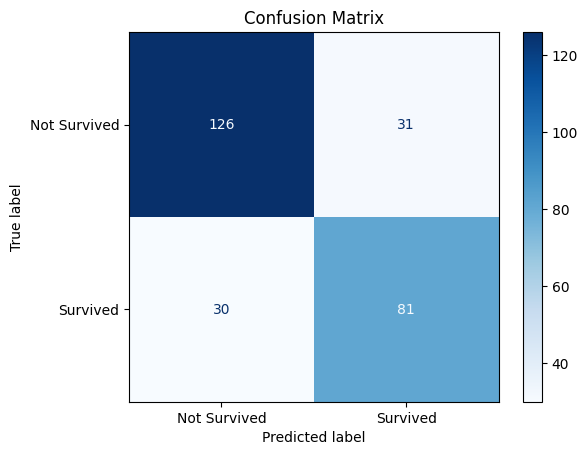

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Построение матрицы
cm = confusion_matrix(y_test, y_pred_class)

# Визуализация
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.metrics import classification_report

# y_pred_class уже есть из model.predict()
report = classification_report(y_test, y_pred_class, target_names=["Not Survived", "Survived"])
print(report)

              precision    recall  f1-score   support

Not Survived       0.81      0.80      0.81       157
    Survived       0.72      0.73      0.73       111

    accuracy                           0.77       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.77      0.77      0.77       268

